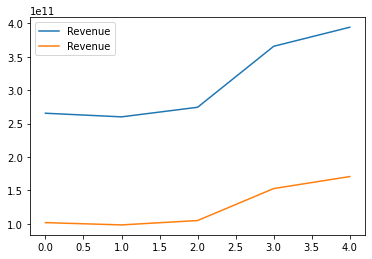

In [9]:

import requests
import matplotlib.pyplot as plt

api_key = '750f9b053da1863e84061a1b89248e00'

company = 'AAPL'
years = 10

income_statement = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}")
income_statement = income_statement.json()


revenues = list(reversed([income_statement[i]['revenue'] for i in range(len(income_statement))]))
profits = list(reversed([income_statement[i]['grossProfit'] for i in range(len(income_statement))]))

plt.plot(revenues, label = 'Revenue')
plt.plot(profits, label = 'Revenue')
plt.legend(loc = 'upper left')
plt.show()

In [10]:
import requests
import matplotlib.pyplot as plt

api_key = '750f9b053da1863e84061a1b89248e00'

company = 'AAPL'
years = 5

income_statements = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}")
income_statements = income_statements.json()

balance_sheets = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={years}&apikey={api_key}")
balance_sheets = balance_sheets.json()

cash_flows = requests.get(f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?limit={years}&apikey={api_key}")
cash_flows = cash_flows.json()

discount_rate = 0.1
growth_rate = 0.05

fcf_list = []
for i in range(years):
    income_statement = income_statements[i]
    balance_sheet = balance_sheets[i]
    cash_flow = cash_flows[i]

    ebit = income_statement['ebitda'] - income_statement['depreciationAndAmortization']
    tax_rate = income_statement['incomeTaxExpense'] / income_statement['incomeBeforeTax']
    change_in_nwc = (balance_sheet['totalCurrentAssets'] - balance_sheet['totalCurrentLiabilities']) - \
                    (balance_sheets[i+1]['totalCurrentAssets'] - balance_sheets[i+1]['totalCurrentLiabilities'] if i < years-1 else 0)
    capex = cash_flow['capitalExpenditure']
    
    fcf = ebit*(1-tax_rate) + income_statement['depreciationAndAmortization'] - change_in_nwc - capex
    fcf_list.append(fcf)

dcf = sum([fcf / ((1 + discount_rate) ** (i+1)) for i, fcf in enumerate(fcf_list)])

print("The DCF value is:", dcf)


The DCF value is: 392542779741.2795


In [25]:
import requests
import matplotlib.pyplot as plt

api_key = '750f9b053da1863e84061a1b89248e00'

company = 'MU'
years = 5

income_statements = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}")
income_statements = income_statements.json()

balance_sheets = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?limit={years}&apikey={api_key}")
balance_sheets = balance_sheets.json()

cash_flows = requests.get(f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?limit={years}&apikey={api_key}")
cash_flows = cash_flows.json()

company_profile = requests.get(f"https://financialmodelingprep.com/api/v3/profile/{company}?apikey={api_key}")
company_profile = company_profile.json()

discount_rate = 0.3
growth_rate = 0.05

fcf_list = []
for i in range(years):
    income_statement = income_statements[i]
    balance_sheet = balance_sheets[i]
    cash_flow = cash_flows[i]

    net_income = income_statement['netIncome']
    interest_expense = income_statement['interestExpense'] if 'interestExpense' in income_statement else 0
    tax_rate = income_statement['incomeTaxExpense'] / income_statement['incomeBeforeTax'] if income_statement['incomeBeforeTax'] != 0 else 0
    depreciation_amortization = income_statement['depreciationAndAmortization']
    change_in_nwc = (balance_sheet['totalCurrentAssets'] - balance_sheet['totalCurrentLiabilities']) - \
                    (balance_sheets[i+1]['totalCurrentAssets'] - balance_sheets[i+1]['totalCurrentLiabilities'] if i < years-1 else 0)
    capex = cash_flow['capitalExpenditure']

    fcf = net_income + (1 - tax_rate) * interest_expense + depreciation_amortization - change_in_nwc - capex
    fcf_list.append(fcf)

terminal_value = fcf_list[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
dcf = sum([fcf / ((1 + discount_rate) ** (i + 1)) for i, fcf in enumerate(fcf_list)]) + terminal_value / ((1 + discount_rate) ** years)

shares_outstanding = company_profile[0]['mktCap'] / company_profile[0]['price'] # market cap divided by share price
dcf_per_share = dcf / shares_outstanding

print("The DCF value per share is:", dcf_per_share)


The DCF value per share is: 66.81350560818191


In [12]:
x = 392542779741.2795/15787154000
x

24.864695672271232

In [13]:
print(shares_outstanding)

15728700415.998129
